### This notebook is used to visualize results. This leads to Figure 1, Figure 2 and Table 1.

In [1]:
# Importing necessary packages
import pandas as pd
import sys,codecs
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st
import collections
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
n = [500,1000,1500]
p = [50,100,200]

************ Results ************

### Loading the results obtained from simulation experiments -- Different networks and settings

In [3]:
##### Network1 LSM 
rho_lsm_n500_p50 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[0]}_p{p[0]}_B500/rho_true_n{n[0]}_p{p[0]}.csv"))
rho_lsm_n500_p100 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[0]}_p{p[1]}_B500/rho_true_n{n[0]}_p{p[1]}.csv"))
rho_lsm_n500_p200 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[0]}_p{p[2]}_B500/rho_true_n{n[0]}_p{p[2]}.csv"))
rho_lsm_n1000_p50 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[1]}_p{p[0]}_B500/rho_true_n{n[1]}_p{p[0]}.csv"))
rho_lsm_n1000_p100 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[1]}_p{p[1]}_B500/rho_true_n{n[1]}_p{p[1]}.csv"))
rho_lsm_n1000_p200 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[1]}_p{p[2]}_B500/rho_true_n{n[1]}_p{p[2]}.csv"))
rho_lsm_n1500_p50 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[2]}_p{p[0]}_B500/rho_true_n{n[2]}_p{p[0]}.csv"))
rho_lsm_n1500_p100 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[2]}_p{p[1]}_B500/rho_true_n{n[2]}_p{p[1]}.csv"))
rho_lsm_n1500_p200 = np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[2]}_p{p[2]}_B500/rho_true_n{n[2]}_p{p[2]}.csv"))

BB = 500
theta_hat_lsm_n500_p50 = np.zeros((BB,3,50))
theta_hat_lsm_n500_p100 = np.zeros((BB,3,100))
theta_hat_lsm_n500_p200 = np.zeros((BB,3,200))
theta_hat_lsm_n1000_p50 = np.zeros((BB,3,50))
theta_hat_lsm_n1000_p100 = np.zeros((BB,3,100))
theta_hat_lsm_n1000_p200 = np.zeros((BB,3,200))
theta_hat_lsm_n1500_p50 = np.zeros((BB,3,50))
theta_hat_lsm_n1500_p100 = np.zeros((BB,3,100))
theta_hat_lsm_n1500_p200 = np.zeros((BB,3,200))

for b in range(BB):
    theta_hat_lsm_n500_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[0]}_p{p[0]}_B500/theta_hat_LSM_n{n[0]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n500_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[0]}_p{p[1]}_B500/theta_hat_LSM_n{n[0]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n500_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[0]}_p{p[2]}_B500/theta_hat_LSM_n{n[0]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n1000_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[1]}_p{p[0]}_B500/theta_hat_LSM_n{n[1]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n1000_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[1]}_p{p[1]}_B500/theta_hat_LSM_n{n[1]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n1000_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[1]}_p{p[2]}_B500/theta_hat_LSM_n{n[1]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n1500_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[2]}_p{p[0]}_B500/theta_hat_LSM_n{n[2]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n1500_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[2]}_p{p[1]}_B500/theta_hat_LSM_n{n[2]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_lsm_n1500_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_LSM_02/n{n[2]}_p{p[2]}_B500/theta_hat_LSM_n{n[2]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]

In [4]:
indd = np.where(theta_hat_lsm_n500_p50==0)
theta_hat_lsm_n500_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n500_p100==0)
theta_hat_lsm_n500_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n500_p200==0)
theta_hat_lsm_n500_p200[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n1000_p50==0)
theta_hat_lsm_n1000_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n1000_p100==0)
theta_hat_lsm_n1000_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n1000_p200==0)
theta_hat_lsm_n1000_p200[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n1500_p50==0)
theta_hat_lsm_n1500_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n1500_p100==0)
theta_hat_lsm_n1500_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_lsm_n1500_p200==0)
theta_hat_lsm_n1500_p200[indd[0],indd[1],indd[2]] = np.nan

In [5]:
#cmle uniform consistency
rho_cmle_maxerr_lsm = np.zeros((BB,9))
rho_cmle_maxerr_lsm[:,0] = np.nanmax(abs(theta_hat_lsm_n500_p50[:,0,:]-((rho_lsm_n500_p50@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_lsm[:,1] = np.nanmax(abs(theta_hat_lsm_n1000_p50[:,0,:]-((rho_lsm_n1000_p50@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_lsm[:,2] = np.nanmax(abs(theta_hat_lsm_n1500_p50[:,0,:]-((rho_lsm_n1500_p50@np.ones((1,BB))).T)[:,:]),1)

rho_cmle_maxerr_lsm[:,3] = np.nanmax(abs(theta_hat_lsm_n500_p100[:,0,:]-((rho_lsm_n500_p100@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_lsm[:,4] = np.nanmax(abs(theta_hat_lsm_n1000_p100[:,0,:]-((rho_lsm_n1000_p100@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_lsm[:,5] = np.nanmax(abs(theta_hat_lsm_n1500_p100[:,0,:]-((rho_lsm_n1500_p100@np.ones((1,BB))).T)[:,:]),1)

rho_cmle_maxerr_lsm[:,6] = np.nanmax(abs(theta_hat_lsm_n500_p200[:,0,:]-((rho_lsm_n500_p200@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_lsm[:,7] = np.nanmax(abs(theta_hat_lsm_n1000_p200[:,0,:]-((rho_lsm_n1000_p200@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_lsm[:,8] = np.nanmax(abs(theta_hat_lsm_n1500_p200[:,0,:]-((rho_lsm_n1500_p200@np.ones((1,BB))).T)[:,:]),1)

In [6]:
# Network2 Block
rho_Block_n500_p50 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[0]}_p{p[0]}_B500/rho_true_n{n[0]}_p{p[0]}.csv"))
rho_Block_n500_p100 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[0]}_p{p[1]}_B500/rho_true_n{n[0]}_p{p[1]}.csv"))
rho_Block_n500_p200 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[0]}_p{p[2]}_B500/rho_true_n{n[0]}_p{p[2]}.csv"))
rho_Block_n1000_p50 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[1]}_p{p[0]}_B500/rho_true_n{n[1]}_p{p[0]}.csv"))
rho_Block_n1000_p100 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[1]}_p{p[1]}_B500/rho_true_n{n[1]}_p{p[1]}.csv"))
rho_Block_n1000_p200 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[1]}_p{p[2]}_B500/rho_true_n{n[1]}_p{p[2]}.csv"))
rho_Block_n1500_p50 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[2]}_p{p[0]}_B500/rho_true_n{n[2]}_p{p[0]}.csv"))
rho_Block_n1500_p100 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[2]}_p{p[1]}_B500/rho_true_n{n[2]}_p{p[1]}.csv"))
rho_Block_n1500_p200 = np.array(pd.read_csv(f"../results/Results_Block_02/n{n[2]}_p{p[2]}_B500/rho_true_n{n[2]}_p{p[2]}.csv"))

BB = 500
theta_hat_Block_n500_p50 = np.zeros((BB,3,50))
theta_hat_Block_n500_p100 = np.zeros((BB,3,100))
theta_hat_Block_n500_p200 = np.zeros((BB,3,200))
theta_hat_Block_n1000_p50 = np.zeros((BB,3,50))
theta_hat_Block_n1000_p100 = np.zeros((BB,3,100))
theta_hat_Block_n1000_p200 = np.zeros((BB,3,200))
theta_hat_Block_n1500_p50 = np.zeros((BB,3,50))
theta_hat_Block_n1500_p100 = np.zeros((BB,3,100))
theta_hat_Block_n1500_p200 = np.zeros((BB,3,200))

for b in range(BB):
    theta_hat_Block_n500_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[0]}_p{p[0]}_B500/theta_hat_Block_n{n[0]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n500_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[0]}_p{p[1]}_B500/theta_hat_Block_n{n[0]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n500_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[0]}_p{p[2]}_B500/theta_hat_Block_n{n[0]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n1000_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[1]}_p{p[0]}_B500/theta_hat_Block_n{n[1]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n1000_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[1]}_p{p[1]}_B500/theta_hat_Block_n{n[1]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n1000_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[1]}_p{p[2]}_B500/theta_hat_Block_n{n[1]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n1500_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[2]}_p{p[0]}_B500/theta_hat_Block_n{n[2]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n1500_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[2]}_p{p[1]}_B500/theta_hat_Block_n{n[2]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_Block_n1500_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_Block_02/n{n[2]}_p{p[2]}_B500/theta_hat_Block_n{n[2]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]

In [7]:
indd = np.where(theta_hat_Block_n500_p50==0)
theta_hat_Block_n500_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n500_p100==0)
theta_hat_Block_n500_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n500_p200==0)
theta_hat_Block_n500_p200[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n1000_p50==0)
theta_hat_Block_n1000_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n1000_p100==0)
theta_hat_Block_n1000_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n1000_p200==0)
theta_hat_Block_n1000_p200[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n1500_p50==0)
theta_hat_Block_n1500_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n1500_p100==0)
theta_hat_Block_n1500_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_Block_n1500_p200==0)
theta_hat_Block_n1500_p200[indd[0],indd[1],indd[2]] = np.nan

In [8]:
#cmle unifotm consistency
rho_cmle_maxerr_Block = np.zeros((BB,9))
rho_cmle_maxerr_Block[:,0] = np.nanmax(abs(theta_hat_Block_n500_p50[:,0,:]-((rho_Block_n500_p50@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_Block[:,1] = np.nanmax(abs(theta_hat_Block_n1000_p50[:,0,:]-((rho_Block_n1000_p50@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_Block[:,2] = np.nanmax(abs(theta_hat_Block_n1500_p50[:,0,:]-((rho_Block_n1500_p50@np.ones((1,BB))).T)[:,:]),1)

rho_cmle_maxerr_Block[:,3] = np.nanmax(abs(theta_hat_Block_n500_p100[:,0,:]-((rho_Block_n500_p100@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_Block[:,4] = np.nanmax(abs(theta_hat_Block_n1000_p100[:,0,:]-((rho_Block_n1000_p100@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_Block[:,5] = np.nanmax(abs(theta_hat_Block_n1500_p100[:,0,:]-((rho_Block_n1500_p100@np.ones((1,BB))).T)[:,:]),1)

rho_cmle_maxerr_Block[:,6] = np.nanmax(abs(theta_hat_Block_n500_p200[:,0,:]-((rho_Block_n500_p200@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_Block[:,7] = np.nanmax(abs(theta_hat_Block_n1000_p200[:,0,:]-((rho_Block_n1000_p200@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_Block[:,8] = np.nanmax(abs(theta_hat_Block_n1500_p200[:,0,:]-((rho_Block_n1500_p200@np.ones((1,BB))).T)[:,:]),1)

In [9]:
# Network 3 dependence
rho_dep_n500_p50 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[0]}_p{p[0]}_B500/rho_true_n{n[0]}_p{p[0]}.csv"))
rho_dep_n500_p100 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[0]}_p{p[1]}_B500/rho_true_n{n[0]}_p{p[1]}.csv"))
rho_dep_n500_p200 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[0]}_p{p[2]}_B500/rho_true_n{n[0]}_p{p[2]}.csv"))
rho_dep_n1000_p50 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[1]}_p{p[0]}_B500/rho_true_n{n[1]}_p{p[0]}.csv"))
rho_dep_n1000_p100 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[1]}_p{p[1]}_B500/rho_true_n{n[1]}_p{p[1]}.csv"))
rho_dep_n1000_p200 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[1]}_p{p[2]}_B500/rho_true_n{n[1]}_p{p[2]}.csv"))
rho_dep_n1500_p50 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[2]}_p{p[0]}_B500/rho_true_n{n[2]}_p{p[0]}.csv"))
rho_dep_n1500_p100 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[2]}_p{p[1]}_B500/rho_true_n{n[2]}_p{p[1]}.csv"))
rho_dep_n1500_p200 = np.array(pd.read_csv(f"../results/Results_dep_02/n{n[2]}_p{p[2]}_B500/rho_true_n{n[2]}_p{p[2]}.csv"))
5
BB = 500
theta_hat_dep_n500_p50 = np.zeros((BB,3,50))
theta_hat_dep_n500_p100 = np.zeros((BB,3,100))
theta_hat_dep_n500_p200 = np.zeros((BB,3,200))
theta_hat_dep_n1000_p50 = np.zeros((BB,3,50))
theta_hat_dep_n1000_p100 = np.zeros((BB,3,100))
theta_hat_dep_n1000_p200 = np.zeros((BB,3,200))
theta_hat_dep_n1500_p50 = np.zeros((BB,3,50))
theta_hat_dep_n1500_p100 = np.zeros((BB,3,100))
theta_hat_dep_n1500_p200 = np.zeros((BB,3,200))

for b in range(BB):
    theta_hat_dep_n500_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[0]}_p{p[0]}_B500/theta_hat_dep_n{n[0]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n500_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[0]}_p{p[1]}_B500/theta_hat_dep_n{n[0]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n500_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[0]}_p{p[2]}_B500/theta_hat_dep_n{n[0]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n1000_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[1]}_p{p[0]}_B500/theta_hat_dep_n{n[1]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n1000_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[1]}_p{p[1]}_B500/theta_hat_dep_n{n[1]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n1000_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[1]}_p{p[2]}_B500/theta_hat_dep_n{n[1]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n1500_p50[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[2]}_p{p[0]}_B500/theta_hat_dep_n{n[2]}_p{p[0]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n1500_p100[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[2]}_p{p[1]}_B500/theta_hat_dep_n{n[2]}_p{p[1]}_"+str(b)+'_.csv')))[:3,:]
    theta_hat_dep_n1500_p200[b,:,:] = (np.array(pd.read_csv(f"../results/Results_dep_02/n{n[2]}_p{p[2]}_B500/theta_hat_dep_n{n[2]}_p{p[2]}_"+str(b)+'_.csv')))[:3,:]

In [10]:
indd = np.where(theta_hat_dep_n500_p50==0)
theta_hat_dep_n500_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n500_p100==0)
theta_hat_dep_n500_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n500_p200==0)
theta_hat_dep_n500_p200[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n1000_p50==0)
theta_hat_dep_n1000_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n1000_p100==0)
theta_hat_dep_n1000_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n1000_p200==0)
theta_hat_dep_n1000_p200[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n1500_p50==0)
theta_hat_dep_n1500_p50[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n1500_p100==0)
theta_hat_dep_n1500_p100[indd[0],indd[1],indd[2]] = np.nan
indd = np.where(theta_hat_dep_n1500_p200==0)
theta_hat_dep_n1500_p200[indd[0],indd[1],indd[2]] = np.nan

In [11]:
#cmle uniform consistency
rho_cmle_maxerr_dep = np.zeros((BB,9))
rho_cmle_maxerr_dep[:,0] = np.max(abs(theta_hat_dep_n500_p50[:,0,:]-((rho_dep_n500_p50@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_dep[:,1] = np.max(abs(theta_hat_dep_n1000_p50[:,0,:]-((rho_dep_n1000_p50@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_dep[:,2] = np.max(abs(theta_hat_dep_n1500_p50[:,0,:]-((rho_dep_n1500_p50@np.ones((1,BB))).T)[:,:]),1)

rho_cmle_maxerr_dep[:,3] = np.max(abs(theta_hat_dep_n500_p100[:,0,:]-((rho_dep_n500_p100@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_dep[:,4] = np.max(abs(theta_hat_dep_n1000_p100[:,0,:]-((rho_dep_n1000_p100@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_dep[:,5] = np.max(abs(theta_hat_dep_n1500_p100[:,0,:]-((rho_dep_n1500_p100@np.ones((1,BB))).T)[:,:]),1)

rho_cmle_maxerr_dep[:,6] = np.max(abs(theta_hat_dep_n500_p200[:,0,:]-((rho_dep_n500_p200@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_dep[:,7] = np.max(abs(theta_hat_dep_n1000_p200[:,0,:]-((rho_dep_n1000_p200@np.ones((1,BB))).T)[:,:]),1)
rho_cmle_maxerr_dep[:,8] = np.max(abs(theta_hat_dep_n1500_p200[:,0,:]-((rho_dep_n1500_p200@np.ones((1,BB))).T)[:,:]),1)

## Figure 1 -- Uniform Consistency of CMLE

## CMLE-three networks

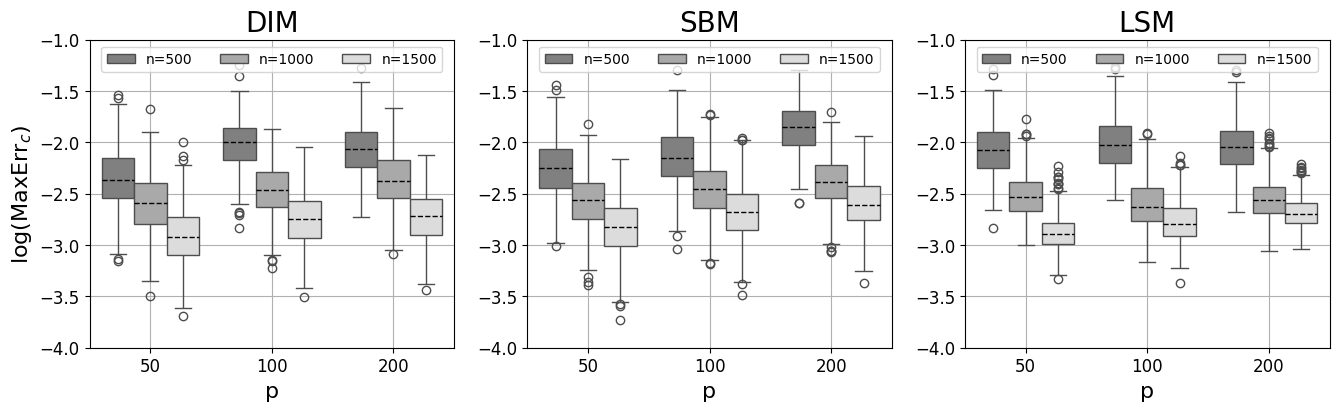

In [12]:
plt.figure(figsize=(16,4))

plt.subplot(131)
nlabel = ['n=500']*BB+['n=1000']*BB+['n=1500']*BB+['n=500']*BB+['n=1000']*BB+['n=1500']*BB+['n=500']*BB+['n=1000']*BB+['n=1500']*BB
plabel = ['50']*BB*3+['100']*BB*3+['200']*BB*3
dfp_dep = pd.DataFrame({'max_err':(np.log(rho_cmle_maxerr_dep).T).flatten(),'plabel':plabel,'n':nlabel})
ax_dep = sns.boxplot(
    x='plabel',
    y='max_err', 
    data=dfp_dep,
    hue='n',
    palette= ['grey','darkgrey','gainsboro'],
    medianprops = {'linestyle':'--','color':'black'},
    hue_order=['n=500','n=1000','n=1500'] 
)
plt.ylabel('log(MaxErr'+r'$_c)$',fontsize=16)
plt.xlabel('p',fontsize=16)
plt.ylim(-4, -1)
#ax.legend(title='Sample size',labels=[r'$n_{p1}$',r'$n_{p2}$',r'$n_{p3}$'])
plt.legend(loc=9, bbox_to_anchor=(0.5, 1), ncol=3)
#sns.move_legend(ax, "lower center",bbox_to_anchor=(0.6, 0.88), ncol=3, title = '')
plt.title('DIM',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()


plt.subplot(132)

nlabel = ['n=500']*BB+['n=1000']*BB+['n=1500']*BB+['n=500']*BB+['n=1000']*BB+['n=1500']*BB+['n=500']*BB+['n=1000']*BB+['n=1500']*BB
plabel = ['50']*BB*3+['100']*BB*3+['200']*BB*3
dfp_Block = pd.DataFrame({'max_err':(np.log(rho_cmle_maxerr_Block).T).flatten(),'plabel':plabel,'n':nlabel})
ax_Block = sns.boxplot(
    x='plabel',
    y='max_err', 
    data=dfp_Block,
    hue='n',
    palette= ['grey','darkgrey','gainsboro'],
    medianprops = {'linestyle':'--','color':'black'},
    hue_order=['n=500','n=1000','n=1500']  
)
plt.ylabel('')
plt.xlabel('p',fontsize=16)
plt.ylim(-4, -1)
#ax.legend(title='Sample size',labels=[r'$n_{p1}$',r'$n_{p2}$',r'$n_{p3}$'])
plt.legend(loc=9, bbox_to_anchor=(0.5, 1), ncol=3)
#sns.move_legend(ax, "lower center",bbox_to_anchor=(0.6, 0.88), ncol=3, title = '')
plt.title('SBM',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

plt.subplot(133)

nlabel = ['n=500']*BB+['n=1000']*BB+['n=1500']*BB+['n=500']*BB+['n=1000']*BB+['n=1500']*BB+['n=500']*BB+['n=1000']*BB+['n=1500']*BB
plabel = ['50']*BB*3+['100']*BB*3+['200']*BB*3
dfp = pd.DataFrame({'max_err':(np.log(rho_cmle_maxerr_lsm).T).flatten(),'plabel':plabel,'n':nlabel})
ax = sns.boxplot(
    x='plabel',
    y='max_err', 
    data=dfp,
    hue='n',
    palette= ['grey','darkgrey','gainsboro'],
    medianprops = {'linestyle':'--','color':'black'},
    hue_order=['n=500','n=1000','n=1500']  
)
plt.ylabel('')
plt.xlabel('p',fontsize=16)
plt.ylim(-4, -1)
#ax.legend(title='Sample size',labels=[r'$n_{p1}$',r'$n_{p2}$',r'$n_{p3}$'])
plt.legend(loc=9, bbox_to_anchor=(0.5, 1), ncol=3)
#sns.move_legend(ax, "lower center",bbox_to_anchor=(0.6, 0.88), ncol=3, title = '')
plt.title('LSM',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()


plt.savefig("Rho_cmle_3W_02_random.pdf",bbox_inches = 'tight')
plt.show()

## Table 1

### Network1-LSM

In [13]:
rho_final_meanerr_cmle_lsm = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[0,0] = np.nanmean(abs(theta_hat_lsm_n500_p50[cc,0,:]-((rho_lsm_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[1,0] = np.nanmean(abs(theta_hat_lsm_n1000_p50[cc,0,:]-((rho_lsm_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[2,0] = np.nanmean(abs(theta_hat_lsm_n1500_p50[cc,0,:]-((rho_lsm_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[0,1] = np.nanmean(abs(theta_hat_lsm_n500_p100[cc,0,:]-((rho_lsm_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[1,1] = np.nanmean(abs(theta_hat_lsm_n1000_p100[cc,0,:]-((rho_lsm_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[2,1] = np.nanmean(abs(theta_hat_lsm_n1500_p100[cc,0,:]-((rho_lsm_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[0,2] = np.nanmean(abs(theta_hat_lsm_n500_p200[cc,0,:]-((rho_lsm_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[1,2] = np.nanmean(abs(theta_hat_lsm_n1000_p200[cc,0,:]-((rho_lsm_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_lsm[2,2] = np.nanmean(abs(theta_hat_lsm_n1500_p200[cc,0,:]-((rho_lsm_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [14]:
rho_final_meanerr_cmle_lsm

array([[0.0470346 , 0.04430701, 0.04095227],
       [0.03182627, 0.0273208 , 0.02694584],
       [0.02337677, 0.02371986, 0.02492286]])

In [15]:
rho_final_meanerr_sarx_lsm = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[0,0] = np.nanmean(abs(theta_hat_lsm_n500_p50[cc,1,:]-((rho_lsm_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[1,0] = np.nanmean(abs(theta_hat_lsm_n1000_p50[cc,1,:]-((rho_lsm_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[2,0] = np.nanmean(abs(theta_hat_lsm_n1500_p50[cc,1,:]-((rho_lsm_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[0,1] = np.nanmean(abs(theta_hat_lsm_n500_p100[cc,1,:]-((rho_lsm_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[1,1] = np.nanmean(abs(theta_hat_lsm_n1000_p100[cc,1,:]-((rho_lsm_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[2,1] = np.nanmean(abs(theta_hat_lsm_n1500_p100[cc,1,:]-((rho_lsm_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[0,2] = np.nanmean(abs(theta_hat_lsm_n500_p200[cc,1,:]-((rho_lsm_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[1,2] = np.nanmean(abs(theta_hat_lsm_n1000_p200[cc,1,:]-((rho_lsm_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_lsm[2,2] = np.nanmean(abs(theta_hat_lsm_n1500_p200[cc,1,:]-((rho_lsm_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [16]:
rho_final_meanerr_sarx_lsm

array([[0.02810747, 0.02594613, 0.02276758],
       [0.0198867 , 0.01663821, 0.01726091],
       [0.01623581, 0.01551095, 0.0157751 ]])

In [17]:
rho_final_meanerr_fmle_lsm = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[0,0] = np.nanmean(abs(theta_hat_lsm_n500_p50[cc,2,:]-((rho_lsm_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[1,0] = np.nanmean(abs(theta_hat_lsm_n1000_p50[cc,2,:]-((rho_lsm_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[2,0] = np.nanmean(abs(theta_hat_lsm_n1500_p50[cc,2,:]-((rho_lsm_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[0,1] = np.nanmean(abs(theta_hat_lsm_n500_p100[cc,2,:]-((rho_lsm_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[1,1] = np.nanmean(abs(theta_hat_lsm_n1000_p100[cc,2,:]-((rho_lsm_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[2,1] = np.nanmean(abs(theta_hat_lsm_n1500_p100[cc,2,:]-((rho_lsm_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[0,2] = np.nanmean(abs(theta_hat_lsm_n500_p200[cc,2,:]-((rho_lsm_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[1,2] = np.nanmean(abs(theta_hat_lsm_n1000_p200[cc,2,:]-((rho_lsm_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_lsm_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_lsm[2,2] = np.nanmean(abs(theta_hat_lsm_n1500_p200[cc,2,:]-((rho_lsm_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [18]:
rho_final_meanerr_fmle_lsm

array([[0.03477563, 0.03360292, 0.03106537],
       [0.02642955, 0.02256157, 0.02213354],
       [0.02047296, 0.02012202, 0.02125091]])

### Network2-SBM 

In [19]:
rho_final_meanerr_cmle_block = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[0,0] = np.nanmean(abs(theta_hat_Block_n500_p50[cc,0,:]-((rho_Block_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[1,0] = np.nanmean(abs(theta_hat_Block_n1000_p50[cc,0,:]-((rho_Block_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[2,0] = np.nanmean(abs(theta_hat_Block_n1500_p50[cc,0,:]-((rho_Block_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[0,1] = np.nanmean(abs(theta_hat_Block_n500_p100[cc,0,:]-((rho_Block_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[1,1] = np.nanmean(abs(theta_hat_Block_n1000_p100[cc,0,:]-((rho_Block_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[2,1] = np.nanmean(abs(theta_hat_Block_n1500_p100[cc,0,:]-((rho_Block_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[0,2] = np.nanmean(abs(theta_hat_Block_n500_p200[cc,0,:]-((rho_Block_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[1,2] = np.nanmean(abs(theta_hat_Block_n1000_p200[cc,0,:]-((rho_Block_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_block[2,2] = np.nanmean(abs(theta_hat_Block_n1500_p200[cc,0,:]-((rho_Block_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [20]:
rho_final_meanerr_cmle_block

array([[0.03502934, 0.03516811, 0.04309199],
       [0.02553482, 0.02519364, 0.02601964],
       [0.01996134, 0.02044881, 0.02102001]])

In [21]:
rho_final_meanerr_sarx_Block = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[0,0] = np.nanmean(abs(theta_hat_Block_n500_p50[cc,1,:]-((rho_Block_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[1,0] = np.nanmean(abs(theta_hat_Block_n1000_p50[cc,1,:]-((rho_Block_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[2,0] = np.nanmean(abs(theta_hat_Block_n1500_p50[cc,1,:]-((rho_Block_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[0,1] = np.nanmean(abs(theta_hat_Block_n500_p100[cc,1,:]-((rho_Block_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[1,1] = np.nanmean(abs(theta_hat_Block_n1000_p100[cc,1,:]-((rho_Block_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[2,1] = np.nanmean(abs(theta_hat_Block_n1500_p100[cc,1,:]-((rho_Block_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[0,2] = np.nanmean(abs(theta_hat_Block_n500_p200[cc,1,:]-((rho_Block_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[1,2] = np.nanmean(abs(theta_hat_Block_n1000_p200[cc,1,:]-((rho_Block_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_Block[2,2] = np.nanmean(abs(theta_hat_Block_n1500_p200[cc,1,:]-((rho_Block_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [22]:
rho_final_meanerr_sarx_Block

array([[0.01186961, 0.01027135, 0.01241437],
       [0.00767795, 0.00733858, 0.00742668],
       [0.00602645, 0.00623767, 0.00611324]])

In [23]:
rho_final_meanerr_fmle_Block = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[0,0] = np.nanmean(abs(theta_hat_Block_n500_p50[cc,2,:]-((rho_Block_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[1,0] = np.nanmean(abs(theta_hat_Block_n1000_p50[cc,2,:]-((rho_Block_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[2,0] = np.nanmean(abs(theta_hat_Block_n1500_p50[cc,2,:]-((rho_Block_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[0,1] = np.nanmean(abs(theta_hat_Block_n500_p100[cc,2,:]-((rho_Block_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[1,1] = np.nanmean(abs(theta_hat_Block_n1000_p100[cc,2,:]-((rho_Block_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[2,1] = np.nanmean(abs(theta_hat_Block_n1500_p100[cc,2,:]-((rho_Block_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[0,2] = np.nanmean(abs(theta_hat_Block_n500_p200[cc,2,:]-((rho_Block_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[1,2] = np.nanmean(abs(theta_hat_Block_n1000_p200[cc,2,:]-((rho_Block_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_Block_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_Block[2,2] = np.nanmean(abs(theta_hat_Block_n1500_p200[cc,2,:]-((rho_Block_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [24]:
rho_final_meanerr_fmle_Block

array([[0.02470341, 0.02099776, 0.02029223],
       [0.01575312, 0.01439814, 0.01443829],
       [0.01242752, 0.01184506, 0.01189726]])

### Network3-DIM 

In [25]:
rho_final_meanerr_cmle_dep = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[0,0] = np.nanmean(abs(theta_hat_dep_n500_p50[cc,0,:]-((rho_dep_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[1,0] = np.nanmean(abs(theta_hat_dep_n1000_p50[cc,0,:]-((rho_dep_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[2,0] = np.nanmean(abs(theta_hat_dep_n1500_p50[cc,0,:]-((rho_dep_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[0,1] = np.nanmean(abs(theta_hat_dep_n500_p100[cc,0,:]-((rho_dep_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[1,1] = np.nanmean(abs(theta_hat_dep_n1000_p100[cc,0,:]-((rho_dep_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[2,1] = np.nanmean(abs(theta_hat_dep_n1500_p100[cc,0,:]-((rho_dep_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[0,2] = np.nanmean(abs(theta_hat_dep_n500_p200[cc,0,:]-((rho_dep_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[1,2] = np.nanmean(abs(theta_hat_dep_n1000_p200[cc,0,:]-((rho_dep_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_cmle_dep[2,2] = np.nanmean(abs(theta_hat_dep_n1500_p200[cc,0,:]-((rho_dep_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [26]:
rho_final_meanerr_cmle_dep

array([[0.03117194, 0.03957864, 0.03465221],
       [0.02420754, 0.02580579, 0.0261531 ],
       [0.01812052, 0.01904748, 0.01884786]])

In [27]:
rho_final_meanerr_sarx_dep = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[0,0] = np.nanmean(abs(theta_hat_dep_n500_p50[cc,1,:]-((rho_dep_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[1,0] = np.nanmean(abs(theta_hat_dep_n1000_p50[cc,1,:]-((rho_dep_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[2,0] = np.nanmean(abs(theta_hat_dep_n1500_p50[cc,1,:]-((rho_dep_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[0,1] = np.nanmean(abs(theta_hat_dep_n500_p100[cc,1,:]-((rho_dep_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[1,1] = np.nanmean(abs(theta_hat_dep_n1000_p100[cc,1,:]-((rho_dep_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[2,1] = np.nanmean(abs(theta_hat_dep_n1500_p100[cc,1,:]-((rho_dep_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[0,2] = np.nanmean(abs(theta_hat_dep_n500_p200[cc,1,:]-((rho_dep_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[1,2] = np.nanmean(abs(theta_hat_dep_n1000_p200[cc,1,:]-((rho_dep_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_sarx_dep[2,2] = np.nanmean(abs(theta_hat_dep_n1500_p200[cc,1,:]-((rho_dep_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [28]:
rho_final_meanerr_sarx_dep

array([[0.0092429 , 0.01130473, 0.01030408],
       [0.0076514 , 0.00755144, 0.00747395],
       [0.005719  , 0.00582657, 0.00585387]])

In [29]:
rho_final_meanerr_fmle_dep = np.zeros((3,3))
#p=50
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[0,0] = np.nanmean(abs(theta_hat_dep_n500_p50[cc,2,:]-((rho_dep_n500_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[1,0] = np.nanmean(abs(theta_hat_dep_n1000_p50[cc,2,:]-((rho_dep_n1000_p50@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p50[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[2,0] = np.nanmean(abs(theta_hat_dep_n1500_p50[cc,2,:]-((rho_dep_n1500_p50@np.ones((1,BB))).T)[cc,:]))
#p=100
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[0,1] = np.nanmean(abs(theta_hat_dep_n500_p100[cc,2,:]-((rho_dep_n500_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[1,1] = np.nanmean(abs(theta_hat_dep_n1000_p100[cc,2,:]-((rho_dep_n1000_p100@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p100[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[2,1] = np.nanmean(abs(theta_hat_dep_n1500_p100[cc,2,:]-((rho_dep_n1500_p100@np.ones((1,BB))).T)[cc,:]))
#p=200
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n500_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[0,2] = np.nanmean(abs(theta_hat_dep_n500_p200[cc,2,:]-((rho_dep_n500_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1000_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[1,2] = np.nanmean(abs(theta_hat_dep_n1000_p200[cc,2,:]-((rho_dep_n1000_p200@np.ones((1,BB))).T)[cc,:]))
cc = list(set(range(BB)).difference(set(np.where(theta_hat_dep_n1500_p200[:,2,0]==0)[0])))
rho_final_meanerr_fmle_dep[2,2] = np.nanmean(abs(theta_hat_dep_n1500_p200[cc,2,:]-((rho_dep_n1500_p200@np.ones((1,BB))).T)[cc,:]))

In [30]:
rho_final_meanerr_fmle_dep

array([[0.01821028, 0.01900451, 0.01983883],
       [0.01634764, 0.01485452, 0.01397138],
       [0.01145386, 0.01028651, 0.01049604]])

## RIM -- Table 1

In [31]:
# LSM
LSM_sarx_up = (1-rho_final_meanerr_sarx_lsm/rho_final_meanerr_cmle_lsm)*100
print('LSM_SARX:\n', LSM_sarx_up)
LSM_fmle_up = (1-rho_final_meanerr_fmle_lsm/rho_final_meanerr_cmle_lsm)*100
print('LSM_FMLE:\n', LSM_fmle_up)
print('LSM_CMLE_MErr:\n' ,rho_final_meanerr_cmle_lsm)
print('LSM_FMLE_MErr:\n' ,rho_final_meanerr_fmle_lsm)

LSM_SARX:
 [[40.24087179 41.44013023 44.40460459]
 [37.5148237  39.10057713 35.94220874]
 [30.547232   34.60772958 36.70432121]]
LSM_FMLE:
 [[26.06372468 24.15892229 24.14249848]
 [16.95678715 17.41981749 17.85918527]
 [12.42175459 15.1680513  14.73328378]]
LSM_CMLE_MErr:
 [[0.0470346  0.04430701 0.04095227]
 [0.03182627 0.0273208  0.02694584]
 [0.02337677 0.02371986 0.02492286]]
LSM_FMLE_MErr:
 [[0.03477563 0.03360292 0.03106537]
 [0.02642955 0.02256157 0.02213354]
 [0.02047296 0.02012202 0.02125091]]


In [32]:
# SBM
SBM_sarx_up = (1-rho_final_meanerr_sarx_Block/rho_final_meanerr_cmle_block)*100
print('SBM_SARX:\n', SBM_sarx_up)
SBM_fmle_up = (1-rho_final_meanerr_fmle_Block/rho_final_meanerr_cmle_block)*100
print('SBM_FMLE:\n', SBM_fmle_up)
print('SBM_CMLE_MErr:\n' ,rho_final_meanerr_cmle_block)
print('SBM_FMLE_MErr:\n' ,rho_final_meanerr_fmle_Block)

SBM_SARX:
 [[66.11524147 70.79356289 71.19100857]
 [69.93144661 70.87129842 71.45741549]
 [69.80938436 69.49616377 70.91706046]]
SBM_FMLE:
 [[29.47794714 40.29318315 52.90949807]
 [38.30729609 42.85010461 44.51002939]
 [37.74207409 42.07454569 43.40028052]]
SBM_CMLE_MErr:
 [[0.03502934 0.03516811 0.04309199]
 [0.02553482 0.02519364 0.02601964]
 [0.01996134 0.02044881 0.02102001]]
SBM_FMLE_MErr:
 [[0.02470341 0.02099776 0.02029223]
 [0.01575312 0.01439814 0.01443829]
 [0.01242752 0.01184506 0.01189726]]


In [33]:
#  DIM
DIM_sarx_up = (1-rho_final_meanerr_sarx_dep/rho_final_meanerr_cmle_dep)*100
print('DIM_SARX:\n', DIM_sarx_up)
DIM_fmle_up = (1-rho_final_meanerr_fmle_dep/rho_final_meanerr_cmle_dep)*100
print('DIM_FMLE:\n', DIM_fmle_up)
print('DIM_CMLE_MErr:\n' ,rho_final_meanerr_cmle_dep)
print('DIM_FMLE_MErr:\n' ,rho_final_meanerr_fmle_dep)

DIM_SARX:
 [[70.34865246 71.43730039 70.26428778]
 [68.39248192 70.73740452 71.4223271 ]
 [68.43906886 69.41029817 68.94146026]]
DIM_FMLE:
 [[41.58116963 51.98290385 42.74872172]
 [32.46881454 42.43728318 46.57847654]
 [36.79064196 45.99541335 44.31176167]]
DIM_CMLE_MErr:
 [[0.03117194 0.03957864 0.03465221]
 [0.02420754 0.02580579 0.0261531 ]
 [0.01812052 0.01904748 0.01884786]]
DIM_FMLE_MErr:
 [[0.01821028 0.01900451 0.01983883]
 [0.01634764 0.01485452 0.01397138]
 [0.01145386 0.01028651 0.01049604]]


## Figure 2 -- Results of SCAD_BIC

In [34]:
# Results from SCAD_BIC
CM_DIM = np.array([3, 70, 83, 87, 93, 0, 29, 51, 63, 91, 0, 7.9, 31.99,51, 78])
CM_SBM = np.array([8, 59, 72, 86, 91, 0, 33.99, 62, 78, 87, 0, 9, 18, 49, 75])
CM_LSM = np.array([6, 41, 65, 83, 87, 0, 14, 43.99, 65, 86, 0, 1, 28, 59, 83])

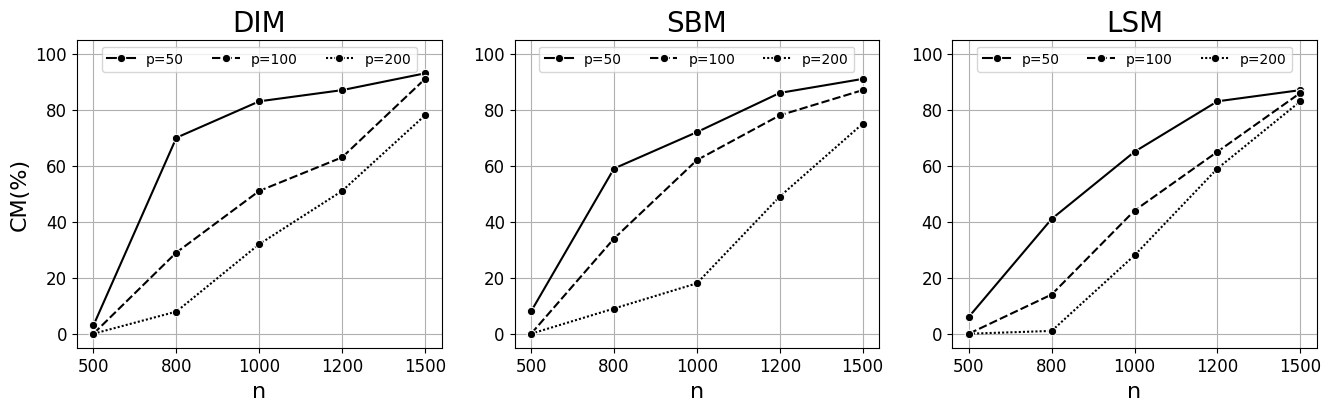

In [35]:
plt.figure(figsize=(16,4))
plt.subplot(131)

nlabel = ['500','800','1000','1200','1500']+['500','800','1000','1200','1500']+['500','800','1000','1200','1500']
plabel = ['p=50']*5+['p=100']*5+['p=200']*5
dfp_Block = pd.DataFrame({'CM':CM_DIM,'plabel':plabel,'n':nlabel})
#plt.figure(figsize=(8,6))
ax_Block = sns.lineplot(
    data=dfp_Block,
    x='n',
    y='CM',
    hue='plabel',
    style='plabel',   
    markers='o',   
    dashes=True,   
    palette=['black','black','black']  
)

plt.ylabel('CM(%)', fontsize=16)
plt.xlabel('n', fontsize=16)
plt.ylim(-5, 105)
plt.legend(loc=9, bbox_to_anchor=(0.5, 1), ncol=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('DIM',fontsize=20)
plt.grid()

plt.subplot(132)

nlabel = ['500','800','1000','1200','1500']+['500','800','1000','1200','1500']+['500','800','1000','1200','1500']
plabel = ['p=50']*5+['p=100']*5+['p=200']*5
dfp_Block = pd.DataFrame({'CM':CM_SBM,'plabel':plabel,'n':nlabel})
#plt.figure(figsize=(8,6))
ax_Block = sns.lineplot(
    data=dfp_Block,
    x='n',
    y='CM',
    hue='plabel',
    style='plabel',   
    markers='o',    
    dashes=True,   
    palette=['black','black','black']  
)

plt.ylabel('')
plt.xlabel('n', fontsize=16)
plt.ylim(-5, 105)
plt.legend(loc=9, bbox_to_anchor=(0.5, 1), ncol=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('SBM',fontsize=20)
plt.grid()

plt.subplot(133)

nlabel = ['500','800','1000','1200','1500']+['500','800','1000','1200','1500']+['500','800','1000','1200','1500']
plabel = ['p=50']*5+['p=100']*5+['p=200']*5
dfp_Block = pd.DataFrame({'CM':CM_LSM,'plabel':plabel,'n':nlabel})
#plt.figure(figsize=(8,6))
ax_Block = sns.lineplot(
    data=dfp_Block,
    x='n',
    y='CM',
    hue='plabel',
    style='plabel',   
    markers='o',   
    dashes=True,   
    palette=['black','black','black']  
)

plt.ylabel('')
plt.xlabel('n', fontsize=16)
plt.ylim(-5, 105)
plt.legend(loc=9, bbox_to_anchor=(0.5, 1), ncol=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('LSM',fontsize=20)
plt.grid()

plt.savefig("CM_3W.pdf",bbox_inches = 'tight')
plt.show()